# Other plots examples

In [3]:
import numpy as np
import pandas as pd

from pythermalcomfort.models import utci

t_range = np.arange(-10, 50, 1)
rh_range = np.arange(0, 101, 5)

results = []
for t in t_range:
    for rh in rh_range:
        utci_value = utci(tdb=t, tr=t, v=0.5, rh=rh)

        results.append(
            {
                "tdb": t,
                "rh": rh,
                "utci": utci_value.utci,
                "heat_stress_level": utci_value.stress_category,
            }
        )

df_utci = pd.DataFrame(results)
# convert heat_stress_level to integer for visualization
heat_stress_mapping = {
    "no thermal stress": 0,
    "slight cold stress": 1,
    "moderate cold stress": 2,
    "strong cold stress": 3,
    "very strong cold stress": 4,
    "extreme cold stress": 5,
    "moderate heat stress": 6,
    "strong heat stress": 7,
    "very strong heat stress": 8,
    "extreme heat stress": 9,
}
df_utci["hsm"] = df_utci["heat_stress_level"].map(heat_stress_mapping)

Text(0.5, 36.72222222222221, 'Air Temperature (°C)')

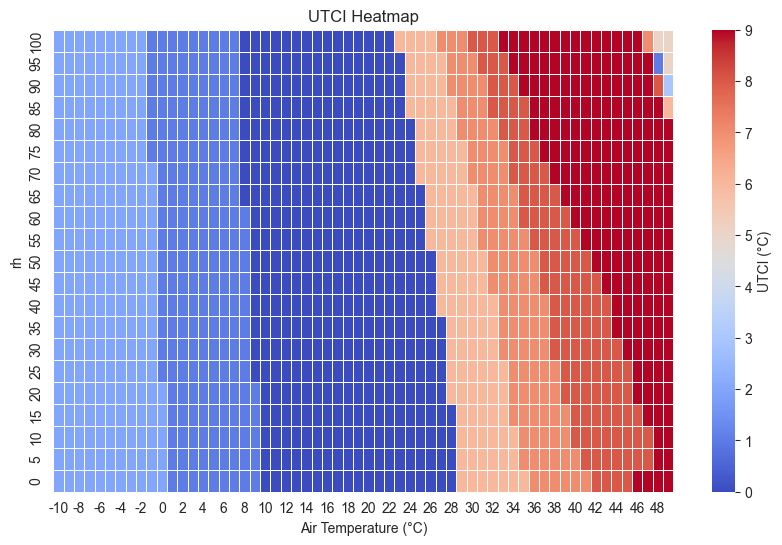

In [4]:
# Create a heatmap using seaborn
import matplotlib.pyplot as plt
import seaborn as sns

df_pivot = df_utci.pivot(index="rh", columns="tdb", values="hsm")
df_pivot.sort_index(ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(
    df_pivot, cmap="coolwarm", cbar_kws={"label": "UTCI (°C)"}, linewidths=0.5
)
heatmap.set_title("UTCI Heatmap")
heatmap.set_xlabel("Air Temperature (°C)")

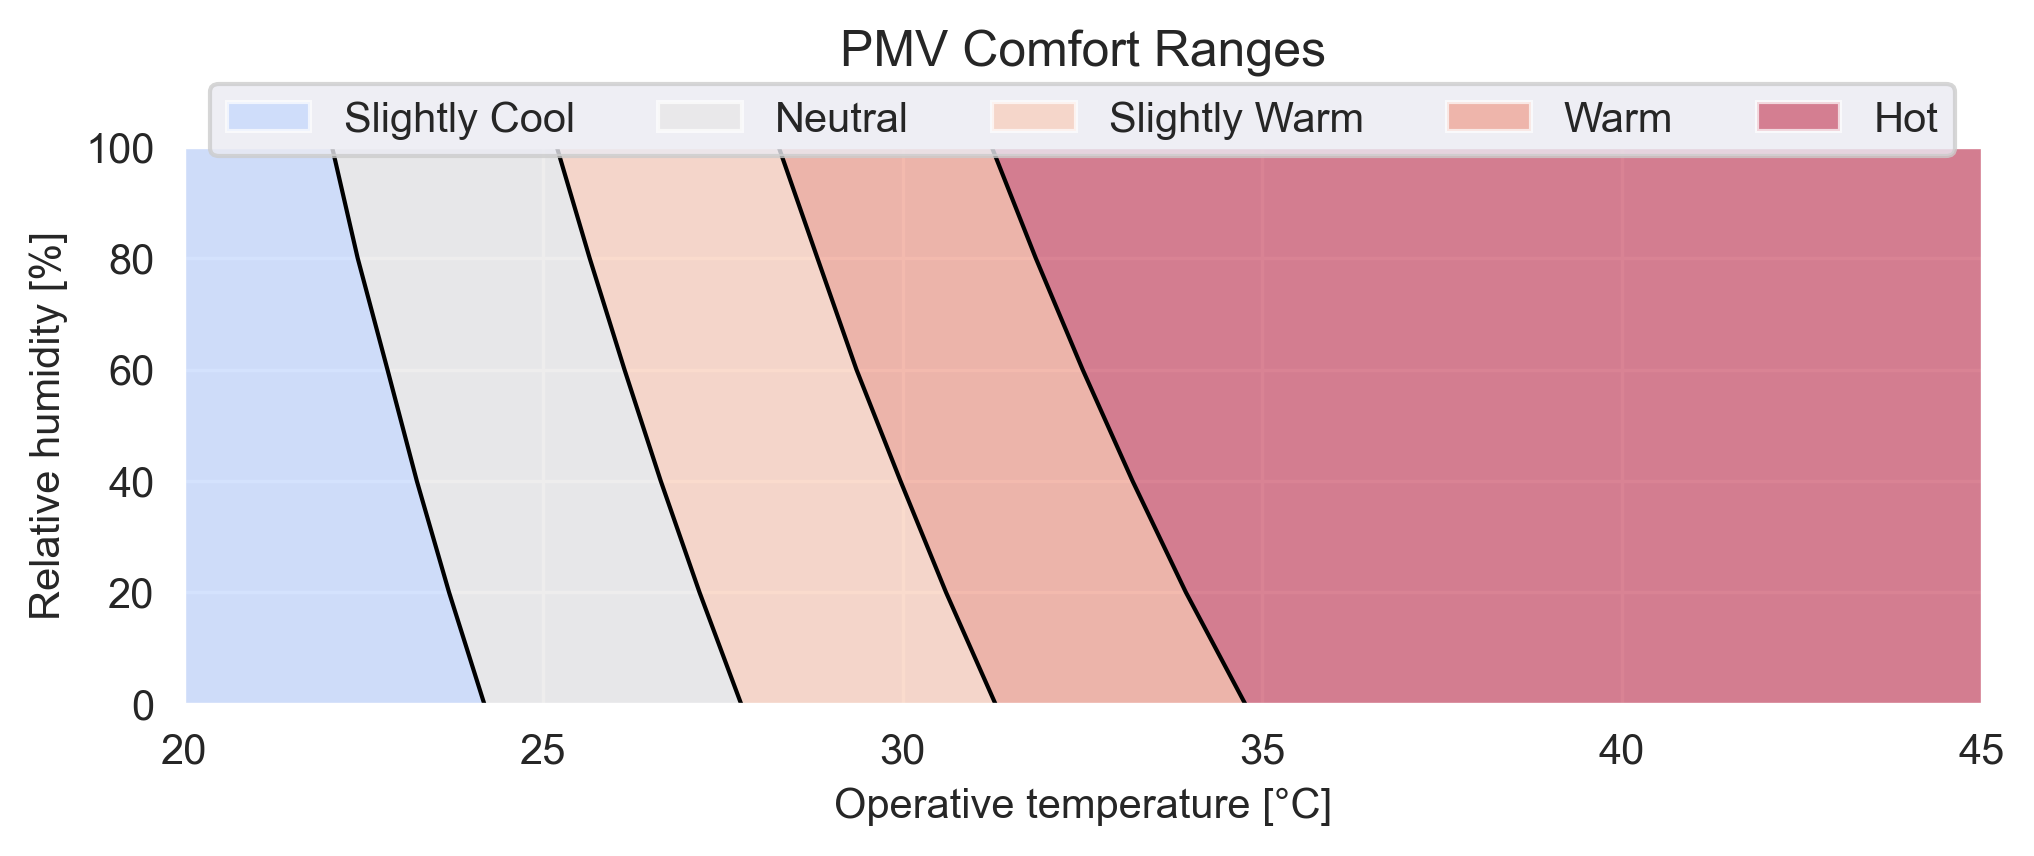

In [5]:
# Example usage
from pythermalcomfort.models import pmv_ppd_iso, utci
from pythermalcomfort.plots.matplotlib import ranges_to_rh

f, axs = plt.subplots(1, 1, figsize=(7, 3), dpi=300)

ax, artists = ranges_to_rh(
    model_func=pmv_ppd_iso,
    fixed_params={"vr": 0.1, "met": 1.2, "clo": 0.5},
    thresholds=[-0.5, 0.5, 1.5, 2.5],  # PMV comfort categories
    t_range=(10, 50),
    rh_range=(0, 100),
    rh_step=20.0,
    smooth_sigma=0,
    plot_kwargs={
        "band_alpha": 0.7,
        "band_colors": ["#C3D7FD", "#E7E6E6", "#F9CDB9", "#EE9D8C", "#CA4F67"],
    },
    ax=axs,
)
# Get the legend from the returned artists
legend = artists.get("legend")
# Get handles and labels from the old legend
handles = legend.legend_handles
# labels = [text.get_text() for text in legend.texts]
labels = [
    "Slightly Cool",
    "Neutral",
    "Slightly Warm",
    "Warm",
    "Hot",
]
# Remove the old legend
legend.remove()
# Create a new legend with 3 columns
ax.legend(handles, labels, ncol=5, loc="upper center", bbox_to_anchor=(0.5, 1.15))

ax.set(xlim=(20, 45), ylim=(0, 100))
ax.set_title("PMV Comfort Ranges", y=1.1)
plt.tight_layout()
# plt.savefig("/Users/ftar3919/Downloads/pmv_ranges_to_rh.png", dpi=300)
plt.show()

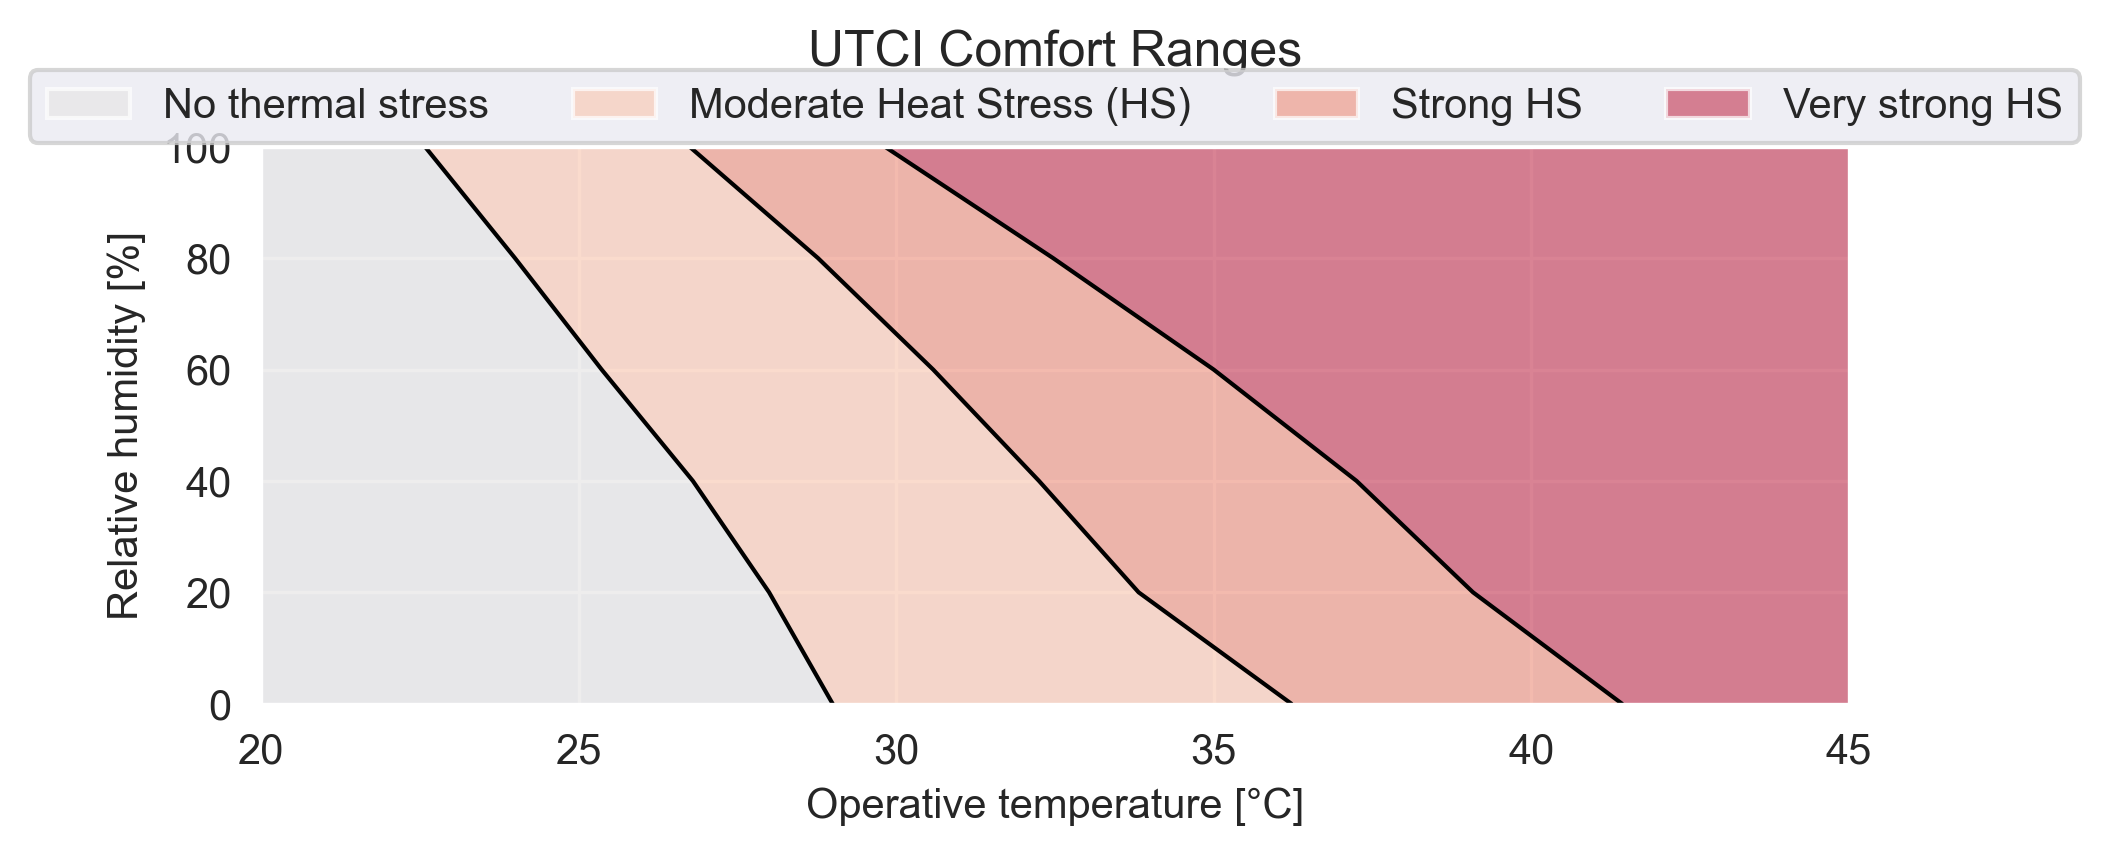

In [6]:
f, axs = plt.subplots(1, 1, figsize=(7, 3), dpi=300)

ax, artists = ranges_to_rh(
    model_func=utci,
    fixed_params={"v": 0.1},
    thresholds=[26, 32, 38],  # UTCI risk categories
    t_range=(10, 50),
    rh_range=(0, 100),
    rh_step=20.0,
    smooth_sigma=0,
    plot_kwargs={
        "band_alpha": 0.7,
        "band_colors": ["#E7E6E6", "#F9CDB9", "#EE9D8C", "#CA4F67"],
    },
    ax=axs,
)
# Get the legend from the returned artists
legend = artists.get("legend")
# Get handles and labels from the old legend
handles = legend.legend_handles
# labels = [text.get_text() for text in legend.texts]
labels = [
    "No thermal stress",
    "Moderate Heat Stress (HS)",
    "Strong HS",
    "Very strong HS",
    "Extreme HS",
]
# Remove the old legend
legend.remove()
# Create a new legend with 3 columns
ax.legend(handles, labels, ncol=4, loc="upper center", bbox_to_anchor=(0.5, 1.175))

ax.set(xlim=(20, 45), ylim=(0, 100))
ax.set_title("UTCI Comfort Ranges", y=1.1)
plt.tight_layout()
# plt.savefig("/Users/ftar3919/Downloads/utci_ranges_to_rh.png", dpi=300)
plt.show()

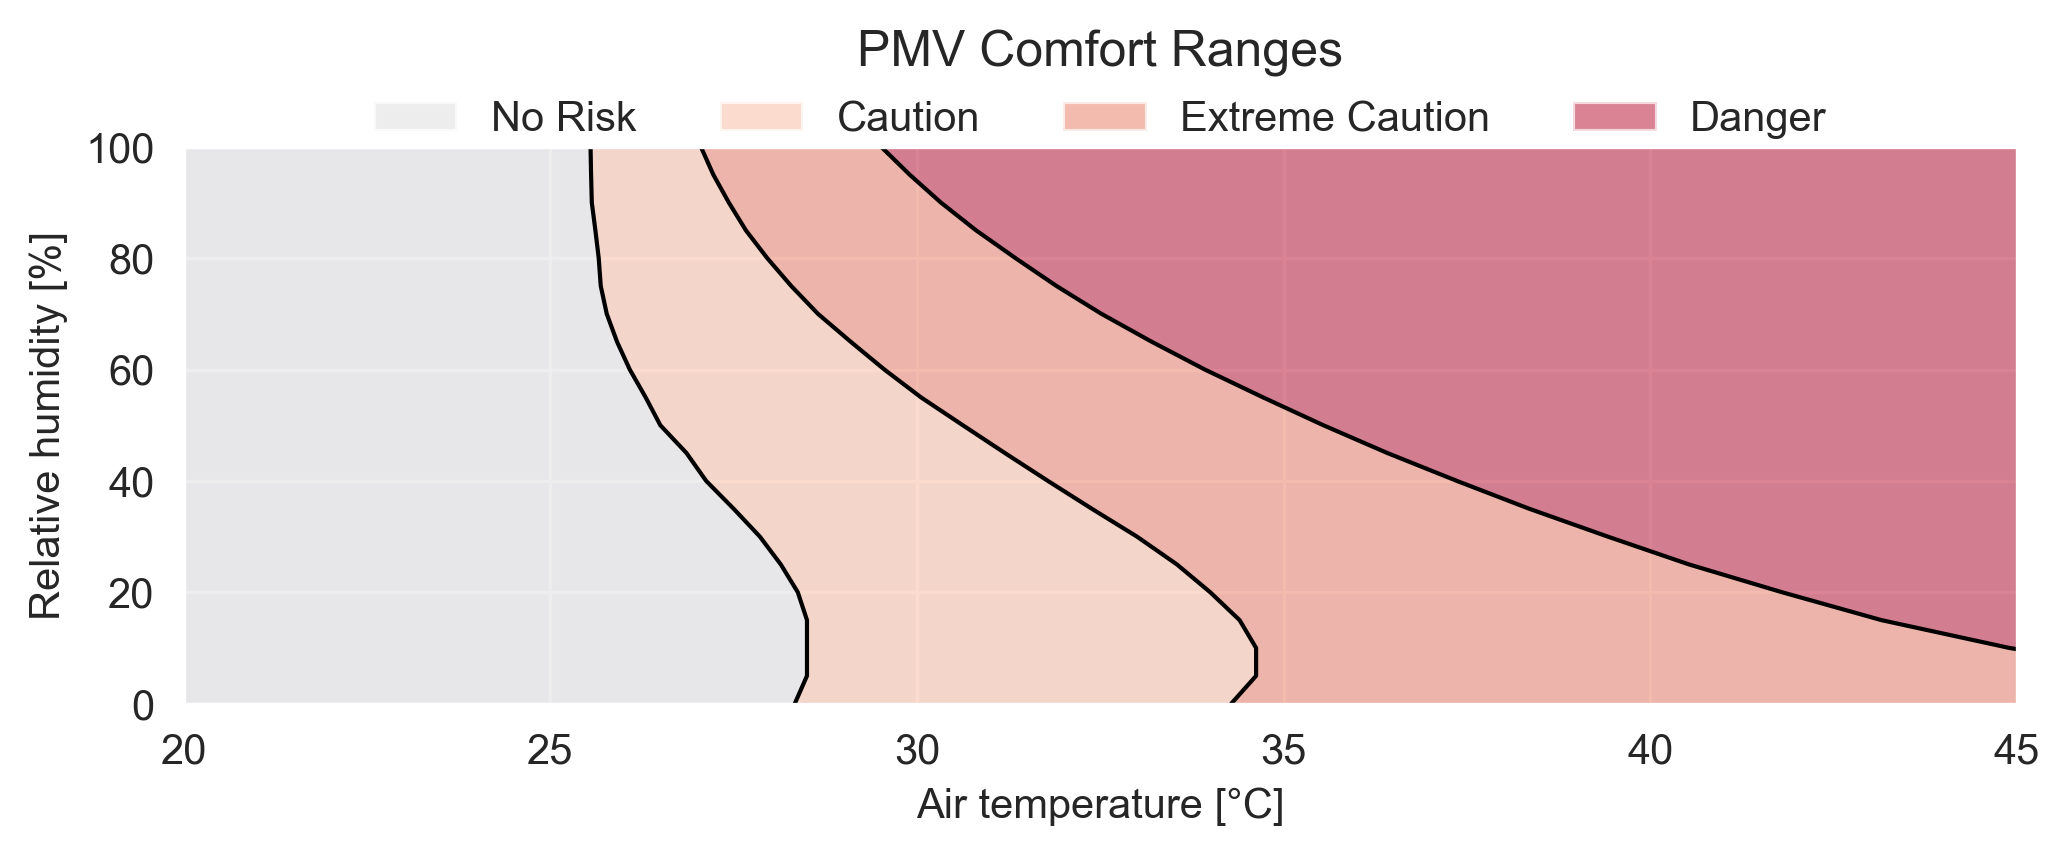

In [7]:
# Example usage
from pythermalcomfort.models import heat_index_rothfusz
from pythermalcomfort.plots.matplotlib import ranges_tdb_rh

f, axs = plt.subplots(1, 1, figsize=(7, 3), dpi=300)

ax, artists = ranges_tdb_rh(
    model_func=heat_index_rothfusz,
    thresholds=[27, 32, 42],
    t_range=(20, 70),
    rh_range=(0, 100),
    rh_step=5.0,
    smooth_sigma=0,
    plot_kwargs={
        "band_alpha": 0.7,
        "band_colors": ["#E7E6E6", "#F9CDB9", "#EE9D8C", "#CA4F67"],
    },
    ax=axs,
)
# Get the legend from the returned artists
legend = artists.get("legend")
# Get handles and labels from the old legend
handles = legend.legend_handles
# labels = [text.get_text() for text in legend.texts]
labels = [
    "No Risk",
    "Caution",
    "Extreme Caution",
    "Danger",
]
# Remove the old legend
legend.remove()
# Create a new legend with 3 columns
ax.legend(
    handles,
    labels,
    ncol=5,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    frameon=False,
)

ax.set(xlim=(20, 45), ylim=(0, 100))
ax.set_title("PMV Comfort Ranges", y=1.1)
plt.tight_layout()
# plt.savefig("/Users/ftar3919/Downloads/hi_ranges_tdb_rh.png", dpi=300)
plt.show()